# HW 1：KNN

In [13]:
import numpy as np
import random
from collections import Counter

In [14]:
########读取机器学习数据集的示例代码 (LIBSVM格式)
def load_svmfile(filename):
    X = []
    Y = []
    with open(filename, 'r') as f:
        filelines = f.readlines()
        for fileline in filelines:
            fileline = fileline.strip().split(' ')
            #print(fileline)
            Y.append(int(fileline[0]))
            tmp = []
            for t in fileline[1:]:
                if len(t)==0:
                    continue
                tmp.append(float(t.split(':')[1]))
            X.append(tmp)
    
    return np.array(X), np.array(Y)

In [15]:
########从这个网址下载数据集：https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#svmguide1
########将数据集保存在当前目录下
########读取数据集

# Tip：此时把文件以.txt扩展名存储，故修改了原有关于dataset的命名~
dataset = 'svmguide1.txt'
dataset_test = 'svmguide1.t.txt'
print('Start loading dataset {}'.format(dataset))
X, Y = load_svmfile(dataset) # train set
X_test, Y_test = load_svmfile('{}'.format(dataset_test)) # test set
print('trainset X shape {}, train label Y shape {}'.format(X.shape, Y.shape))
print('testset X_test shape {}, test label Y shape {}'.format(X_test.shape, Y_test.shape))

Start loading dataset svmguide1.txt
trainset X shape (3089, 4), train label Y shape (3089,)
testset X_test shape (4000, 4), test label Y shape (4000,)


In [16]:
########实现一个KNN分类器的模型，需要完成的功能包括train, test和_calculate_distances三部分
import copy

class KNN_model():
    def __init__(self, k=1):
        self.k = k
    
    def train(self, x_train, y_train):
        """Implement the training code for KNN
        Input: 
            x_train: Training instances of size (N, D), where N denotes the number of instances and D denotes the feature dimension
            y_train: Training labels of size (N, )
        """
        # Lazy Train
        self.x_train = x_train
        self.y_train = y_train
    
    
    def test(self, x_test):
        """
        Input: Test instances of size (N, D), where N denotes the number of instances and D denotes the feature dimension
        Return: Predicted labels of size (N, )
        """
        self.y_pre = []
        for x in range(len(x_test)):
            all_d = self._calculate_distances(x_test[x])
            sorted_d = copy.deepcopy(all_d)
            sorted_d.sort()
            
            label = []
            for i in range(self.k):
                label.append(self.y_train[all_d.index(sorted_d[i])])
            
            count_label = []
            for i in label:
                count_label.append(label.count(i))
            m = max(count_label)
            c = 0
            for i in range(len(count_label)):
                if m == count_label[i]:
                    c = i
                    break
            self.y_pre.append(label[c])
        self.y_pre = np.array(self.y_pre)
        return(self.y_pre)

    # _开头的函数为类的built in函数，只能类内访问
    def _calculate_distances(self, point):
        """Calculate the euclidean distance between a【一个】 test instance and all【所有】 points in the training set x_train
        Input: a single point of size (D, )
        Return: distance matrix of size (N, )
        """
        distances = []
        for i in self.x_train:
            dis = 0
            for j in range(len(i)):
                dis += (i[j] - point[j]) ** 2
            distances.append(dis ** 0.5)
        return distances

In [17]:
######### 将原来的训练集划分成两部分：训练和验证
random.seed(777777) #定下随机种子
N = X.shape[0] 
valid_frac = 0.2 # 设置验证集的比例为20%
valid_size = int(N*valid_frac)

# 出于简单起见，这里直接使用random shuffle来划分
shuffle_index = [i for i in range(N)]
random.shuffle(shuffle_index)
valid_index, train_index = shuffle_index[:valid_size], shuffle_index[valid_size:]
X_valid, Y_valid = X[valid_index], Y[valid_index]
X_train, Y_train = X[train_index], Y[train_index]
print('trainset X_train shape {}, validset X_valid shape {}'.format(X_train.shape, X_valid.shape))

trainset X_train shape (2472, 4), validset X_valid shape (617, 4)


In [18]:
######### 这里需要实现计算准确率的函数，注意我们期望的输出是百分制，如准确率是0.95，我们期望的输出是95
def cal_accuracy(y_pred, y_gt):
    '''
    y_pred: predicted labels (N,)
    y_gt: ground truth labels (N,)
    Return: Accuracy (%)
    '''
    accuracy = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_gt[i]:
            accuracy += 1
    accuracy = (accuracy / len(y_pred)) * 100
    return accuracy

assert abs(cal_accuracy(np.zeros(Y.shape[0]), Y)-100*1089.0/3089.0)<1e-3

k=1, accuracy on validation=96.27228525121556%
k=3, accuracy on validation=96.27228525121556%
k=5, accuracy on validation=96.27228525121556%
k=7, accuracy on validation=96.43435980551054%
k=9, accuracy on validation=96.11021069692059%
k=11, accuracy on validation=95.62398703403565%


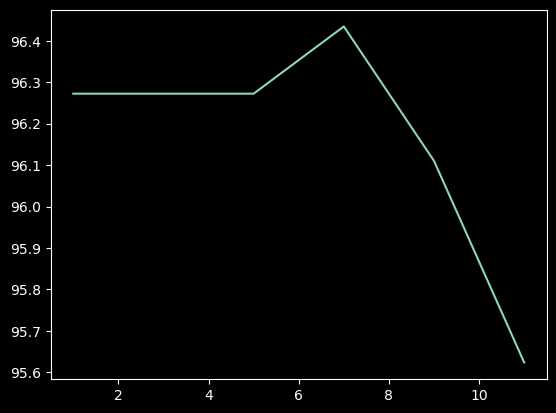

In [19]:
#####使用验证集来选择超参数
possible_k_list = [1,3,5,7,9,11] # 在本次实验中候选的超参数取值
# Tip：只有奇数才不会出现平票的情况（只有两个类时）

accs = [] # 将每个取值k对应的验证集准确率加入列表
for k in possible_k_list:
    #####模型的超参数设置为k
    knn = KNN_model(k)
    #####在训练集上训练, 提示: model.train()
    knn.train(X_train, Y_train)
    #####在验证集X_valid上给出预测结果 Y_pred_valid, 提示：model.test()
    Y_pred_valid = knn.test(X_valid)
    #####计算验证集上的准确率
    acc_k = cal_accuracy(Y_pred_valid, Y_valid)
    #####将每个取值k对应的验证集准确率加入列表
    accs.append(acc_k)
    print('k={}, accuracy on validation={}%'.format(k, acc_k))

import matplotlib.pyplot as plt
plt.plot(possible_k_list, accs) #画出每个k对应的验证集准确率

In [20]:
#####基于上面的结果确定验证集上的最好的超参数k，根据这个k最终在测试集上进行测试

#####定义最好的k对应的模型
knn1 = KNN_model(7)
knn1.train(X,Y)
Y_pred_test = knn1.test(X_test)

#####在训练集上训练，注意这里可以使用全部的训练数据

#####在测试集上测试生成预测 Y_pred_test
print('Test Accuracy={}%'.format(cal_accuracy(Y_pred_test, Y_test)))

Test Accuracy=96.575%


In [21]:
#####以下需要实现5折交叉验证，可以参考之前训练集和验证集划分的方式

folds = 5
shuffle_index = [i for i in range(N)]
size = int(N / folds)
random.shuffle(shuffle_index)

for k in possible_k_list: # 遍历所有可能的k
    print('******k={}******'.format(k))
    valid_accs = []

    for i in range(folds): # 第i折的实验
        ##### 生成第i折的训练集 X_train_i, Y_train_i和验证集 X_valid_i, Y_valid_i; 提示：可参考之前random shuffle的方式来生成index

        if i < folds - 1:
            X_valid_i, Y_valid_i = X[shuffle_index[i*size: (i+1)*size]], Y[shuffle_index[i*size: (i+1)*size]]
            rest_index = [j for j in range(N) if j not in shuffle_index[i*size: (i+1)*size]]
            X_train_i, Y_train_i = X[rest_index], Y[rest_index]
        
        else:
            X_valid_i, Y_valid_i = X[shuffle_index[i*size:]], Y[shuffle_index[i*size:]]
            rest_index = [j for j in range(N) if j not in shuffle_index[i*size:]]
            X_train_i, Y_train_i = X[rest_index], Y[rest_index]
        
        ##### 定义超参数设置为k的模型
        knn2 = KNN_model(k)
        ##### 在Fold-i上进行训练
        knn2.train(X_train_i, Y_train_i)
        ##### 给出Fold-i验证集X_valid_i上的预测结果 Y_pred_valid_i
        Y_pred_valid_i = knn2.test(X_valid_i)
        acc = cal_accuracy(Y_pred_valid_i, Y_valid_i)
        valid_accs.append(acc)
        print('Valid Accuracy on Fold-{}: {}%'.format(i+1, acc))
    
    print('k={}, Accuracy {}+-{}%'.format(k, np.mean(valid_accs), np.std(valid_accs)))


******k=1******
Valid Accuracy on Fold-1: 94.81361426256078%
Valid Accuracy on Fold-2: 95.62398703403565%
Valid Accuracy on Fold-3: 95.9481361426256%
Valid Accuracy on Fold-4: 94.97568881685575%
Valid Accuracy on Fold-5: 96.45732689210949%
k=1, Accuracy 95.56375062963744+-0.6096524335597422%
******k=3******
Valid Accuracy on Fold-1: 96.92058346839546%
Valid Accuracy on Fold-2: 96.92058346839546%
Valid Accuracy on Fold-3: 95.78606158833063%
Valid Accuracy on Fold-4: 96.92058346839546%
Valid Accuracy on Fold-5: 96.94041867954911%
k=3, Accuracy 96.69764613461322+-0.45585700783857647%
******k=5******
Valid Accuracy on Fold-1: 96.5964343598055%
Valid Accuracy on Fold-2: 96.5964343598055%
Valid Accuracy on Fold-3: 96.11021069692059%
Valid Accuracy on Fold-4: 96.27228525121556%
Valid Accuracy on Fold-5: 97.42351046698873%
k=5, Accuracy 96.59977502694719+-0.45287640294841575%
******k=7******
Valid Accuracy on Fold-1: 96.5964343598055%
Valid Accuracy on Fold-2: 97.08265802269044%
Valid Accuracy

In [22]:
#####基于交叉验证确定验证集上的最好的超参数k，根据这个k最终在测试集上进行测试
#####定义最好的k对应的模型
knn_best = KNN_model(7)
#####在训练集上训练，注意这里可以使用全部的训练数据
knn_best.train(X, Y)
#####在测试集上测试生成预测 Y_pred_test
Y_pred_test = knn_best.test(X_test)
print('Test Accuracy chosing k using cross-validation={}%'.format(cal_accuracy(Y_pred_test, Y_test)))

Test Accuracy chosing k using cross-validation=96.575%


In [23]:
#####如果训练/测试集不均衡如果评估模型呢？
#####生成一个不均衡的测试集，由于示例数据集中所有的标签1都在后面所以出于方便直接这样来生成一个不均衡的测试集

N_test = int(X_test.shape[0]*0.7)
X_test, Y_test = X_test[:N_test], Y_test[:N_test]
print(Counter(Y_test)) # 输出新的测试集中的标签分布

best_k = 5
model = KNN_model(k=best_k) # 此处请填入交叉验证确定的最好的k
model.train(X, Y)
Y_pred_test = model.test(X_test)

#实现计算percision， recall和F1 score的函数
def cal_prec_recall_f1(Y_pred, Y_gt):
    '''
    Input: predicted labels y_pred, ground truth labels Y_gt
    Retur: precision, recall, and F1 score
    '''
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(Y_pred)):
        if Y_gt[i] == 1:
            if Y_pred[i] == 1:
                tp += 1
            else:
                fn += 1
        else:
            if Y_pred[i] == 1:
                fp += 1
            else:
                tn += 1
    print(tp, fp, tn, fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*precision*recall / (precision + recall)
    return precision, recall, f1

p, r, f1 = cal_prec_recall_f1(Y_pred_test, Y_test)
print(f"""
Precision: {p} \n
Recall: {r} \n
F1: {f1}
""")

Counter({0: 2000, 1: 800})
772 75 1925 28

Precision: 0.911452184179457 \
Recall: 0.965 \
F1: 0.9374620522161505

